# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [1]:
# Import essential libraries for data manipulation and analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#suppress warnings
import warnings 
warnings.filterwarnings('ignore')

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [33]:
# Importing the file porter_data_1.csv

porter = pd.read_csv(r"C:\Shikha_Documents\PG\Python Code\Class\ML1\Case Study\Delivery_Starter\porter_data_1.csv")

In [3]:
porter.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

In [4]:
porter.shape

(175777, 14)

In [5]:
porter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

In [6]:
porter.describe()

market_id  store_primary_category  order_protocol    total_items  \
count  175777.000000           175777.000000   175777.000000  175777.000000   
mean        2.743726               35.887949        2.911752       3.204976   
std         1.330963               20.728254        1.513128       2.674055   
min         1.000000                0.000000        1.000000       1.000000   
25%         2.000000               18.000000        1.000000       2.000000   
50%         2.000000               38.000000        3.000000       3.000000   
75%         4.000000               55.000000        4.000000       4.000000   
max         6.000000               72.000000        7.000000     411.000000   

            subtotal  num_distinct_items  min_item_price  max_item_price  \
count  175777.000000       175777.000000   175777.000000   175777.000000   
mean     2697.111147            2.675060      684.965433     1160.158616   
std      1828.554893            1.625681      519.882924      560.828571   
min         0.000000            1.000000      -86.000000        0.000000   
25%      1412.000000            1.000000      299.000000      799.000000   
50%      2224.000000            2.000000      595.000000     1095.000000   
75%      3410.000000            3.000000      942.000000     1395.000000   
max     26800.000000           20.000000    14700.000000    14700.000000   

       total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
count          175777.000000       175777.000000             175777.000000   
mean               44.918664           41.861381                 58.230115   
std                34.544724           32.168505                 52.731043   
min                -4.000000           -5.000000                 -6.000000   
25%                17.000000           15.000000                 17.000000   
50%                37.000000           35.000000                 41.000000   
75%                66.000000           63.000000                 85.000000   
max               171.000000          154.000000                285.000000   

            distance  
count  175777.000000  
mean       21.843090  
std         8.748712  
min         0.000000  
25%        15.360000  
50%        21.760000  
75%        28.120000  
max        83.520000

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [34]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

porter['created_at'] = pd.to_datetime(porter['created_at'])
porter['actual_delivery_time'] = pd.to_datetime(porter['actual_delivery_time'])

In [8]:
porter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  float64       
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [35]:
# Convert categorical features to category type

#List of categorical features 
category_columns = ['store_primary_category', 'order_protocol']

# Convert all columns in above list to 'category' type
porter[category_columns] = porter[category_columns].apply(lambda x: x.astype('category'))

# check  datatypes
print(porter.dtypes)


market_id                          float64
created_at                  datetime64[ns]
actual_delivery_time        datetime64[ns]
store_primary_category            category
order_protocol                    category
total_items                          int64
subtotal                             int64
num_distinct_items                   int64
min_item_price                       int64
max_item_price                       int64
total_onshift_dashers              float64
total_busy_dashers                 float64
total_outstanding_orders           float64
distance                           float64
dtype: object


#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [36]:
# Calculate time taken in minutes

porter['time_taken'] = (porter['actual_delivery_time'] - porter['created_at']).dt.total_seconds()/60

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [37]:
# Extract the hour and day of week from the 'created_at' timestamp

porter['created_hour'] = porter['created_at'].dt.hour
porter['day_of_week'] = porter['created_at'].dt.dayofweek

# Create a categorical feature 'isWeekend'
porter['is_weekend'] = porter['day_of_week'].apply(lambda x: 1 if x >=5 else 0)



In [38]:
# Drop unnecessary columns
porter = porter.drop(columns = ['market_id', 'created_at','actual_delivery_time'])


In [39]:
porter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   store_primary_category    175777 non-null  category
 1   order_protocol            175777 non-null  category
 2   total_items               175777 non-null  int64   
 3   subtotal                  175777 non-null  int64   
 4   num_distinct_items        175777 non-null  int64   
 5   min_item_price            175777 non-null  int64   
 6   max_item_price            175777 non-null  int64   
 7   total_onshift_dashers     175777 non-null  float64 
 8   total_busy_dashers        175777 non-null  float64 
 9   total_outstanding_orders  175777 non-null  float64 
 10  distance                  175777 non-null  float64 
 11  time_taken                175777 non-null  float64 
 12  created_hour              175777 non-null  int32   
 13  day_of_week               175

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [40]:
# Define target variable (y) and features (X)

target_df = pd.DataFrame(porter['time_taken'])

feature_df = porter.drop(columns = ['time_taken'])

In [15]:
print(target_df.info())
print(feature_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 1 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   time_taken  175777 non-null  float64
dtypes: float64(1)
memory usage: 1.3 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   store_primary_category    175777 non-null  category
 1   order_protocol            175777 non-null  category
 2   total_items               175777 non-null  int64   
 3   subtotal                  175777 non-null  int64   
 4   num_distinct_items        175777 non-null  int64   
 5   min_item_price            175777 non-null  int64   
 6   max_item_price            175777 non-null  int64   
 7   total_onshift_dashers     175777 non-null  float64 
 8   total_busy_dashers        175777 

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [41]:
# Split data into training and testing sets

from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(porter, train_size= 0.8, test_size= 0.2, random_state= 100)


In [17]:
df_train.head()

store_primary_category order_protocol  total_items  subtotal  \
42111                       7            2.0            1      1350   
58452                      46            5.0            5      4285   
20644                      45            2.0            6      7880   
79735                      45            2.0            3      3660   
167933                      4            5.0            5      8575   

        num_distinct_items  min_item_price  max_item_price  \
42111                    1            1350            1350   
58452                    5             495             900   
20644                    3            1195            1450   
79735                    3             975            1450   
167933                   5            1200            2625   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
42111                    23.0                20.0                      19.0   
58452                   112.0               100.0                     207.0   
20644                    80.0                79.0                     115.0   
79735                   127.0               106.0                     173.0   
167933                   44.0                44.0                      61.0   

        distance  time_taken  created_hour  day_of_week  is_weekend  
42111       9.60        32.0            20            0           0  
58452      34.56        71.0             2            5           1  
20644      34.92        62.0             3            4           0  
79735      25.76        54.0             2            5           1  
167933     17.72        56.0             2            3           0

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140621 entries, 42111 to 38408
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   store_primary_category    140621 non-null  category
 1   order_protocol            140621 non-null  category
 2   total_items               140621 non-null  int64   
 3   subtotal                  140621 non-null  int64   
 4   num_distinct_items        140621 non-null  int64   
 5   min_item_price            140621 non-null  int64   
 6   max_item_price            140621 non-null  int64   
 7   total_onshift_dashers     140621 non-null  float64 
 8   total_busy_dashers        140621 non-null  float64 
 9   total_outstanding_orders  140621 non-null  float64 
 10  distance                  140621 non-null  float64 
 11  time_taken                140621 non-null  float64 
 12  created_hour              140621 non-null  int32   
 13  day_of_week               14062

In [42]:
# Define numerical and categorical columns for easy EDA and data manipulation

numerical_columns = ['total_items','subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price' , 
                     'total_onshift_dashers' , 'total_busy_dashers' , 'total_outstanding_orders' , 'distance']

categorical_columns = ['store_primary_category','order_protocol','created_hour', 'day_of_week' , 'is_weekend']


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

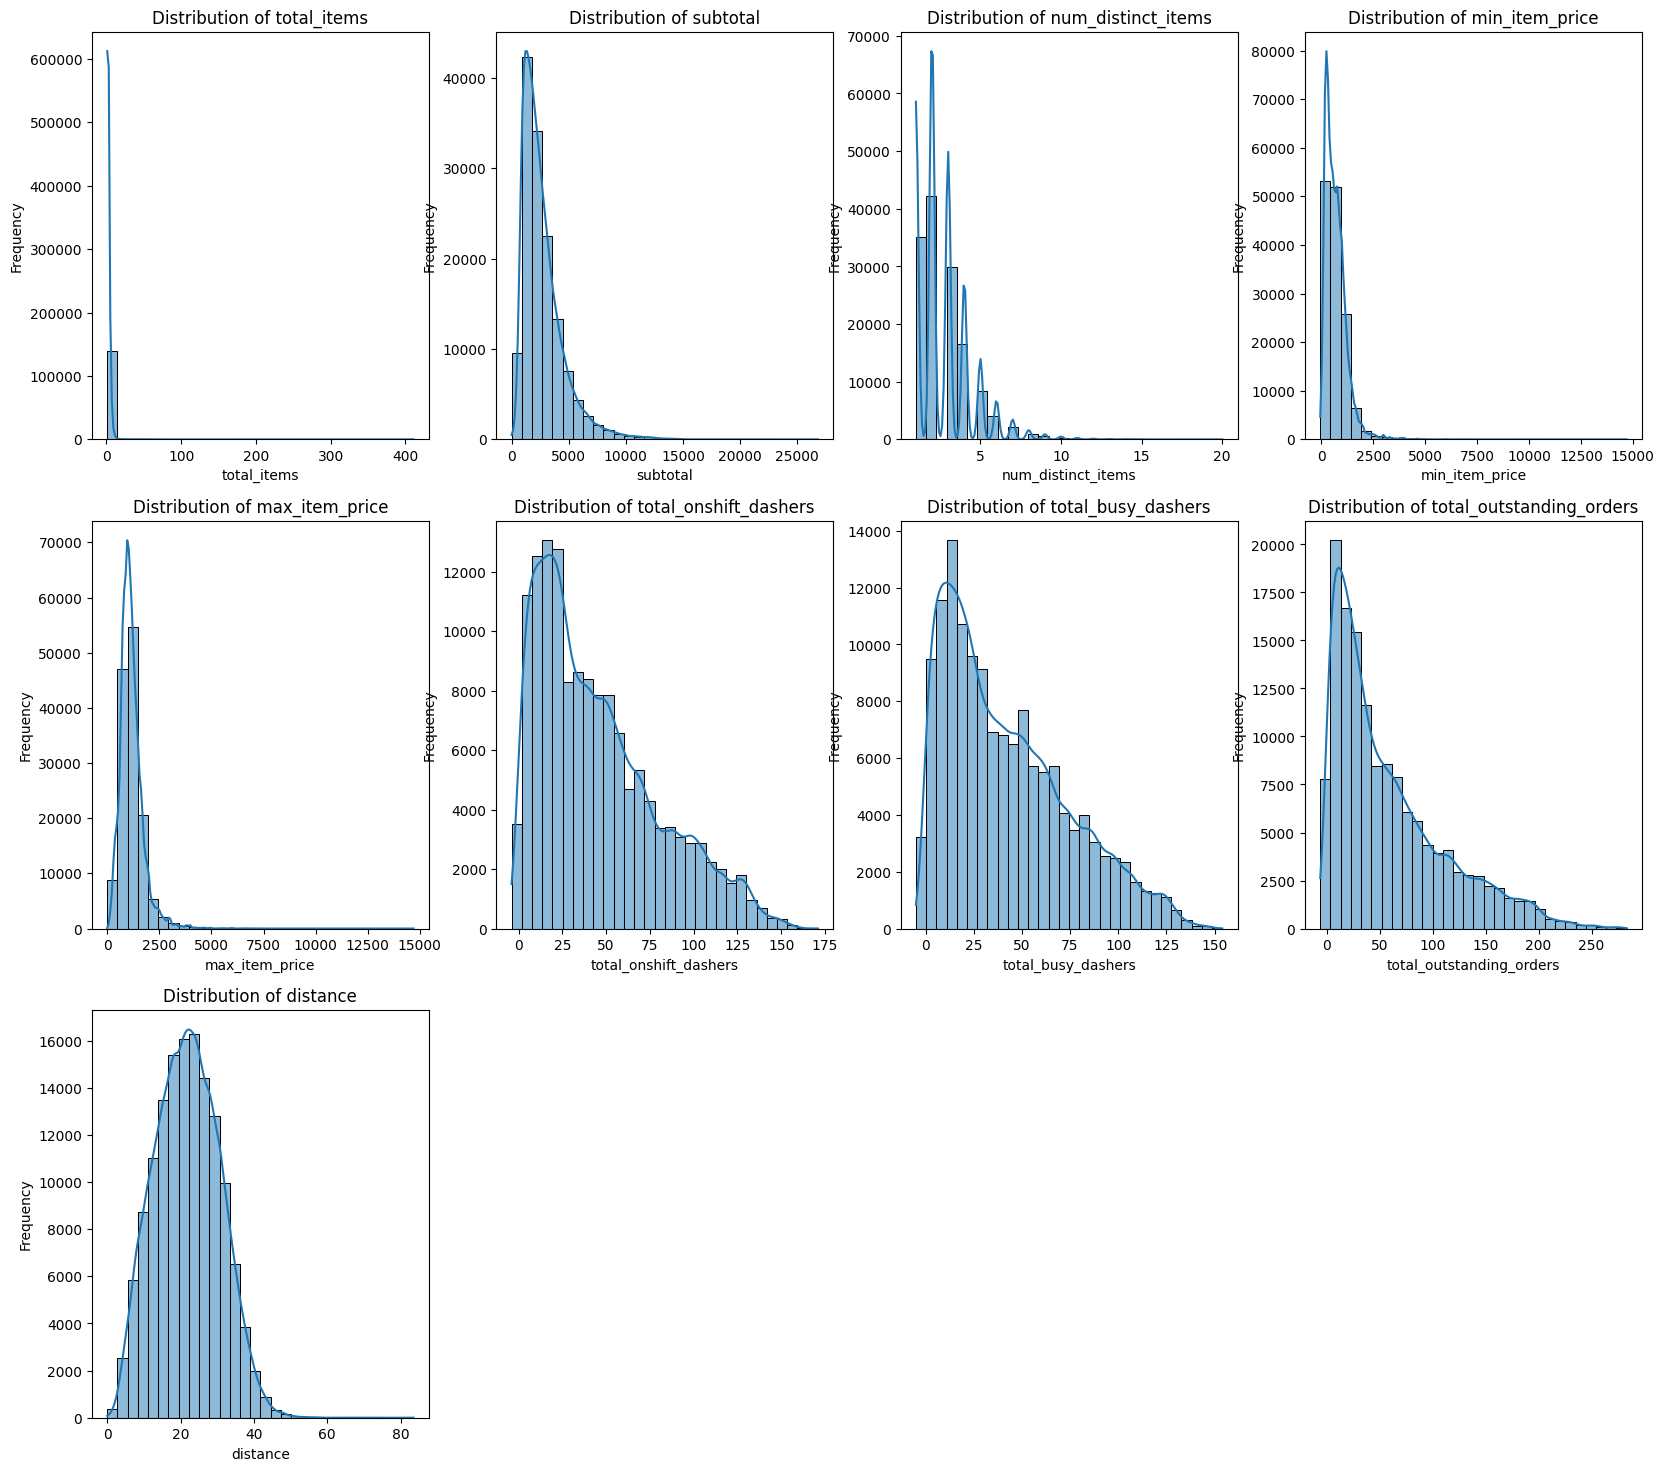

In [21]:
# Plot distributions for all numerical columns

i =1 

plt.figure(figsize=(20, 18))

for col in numerical_columns:
    plt.subplot(3,4,i)
    sns.histplot( df_train[col] , kde = True , bins = 30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    i +=1

plt.show()


##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

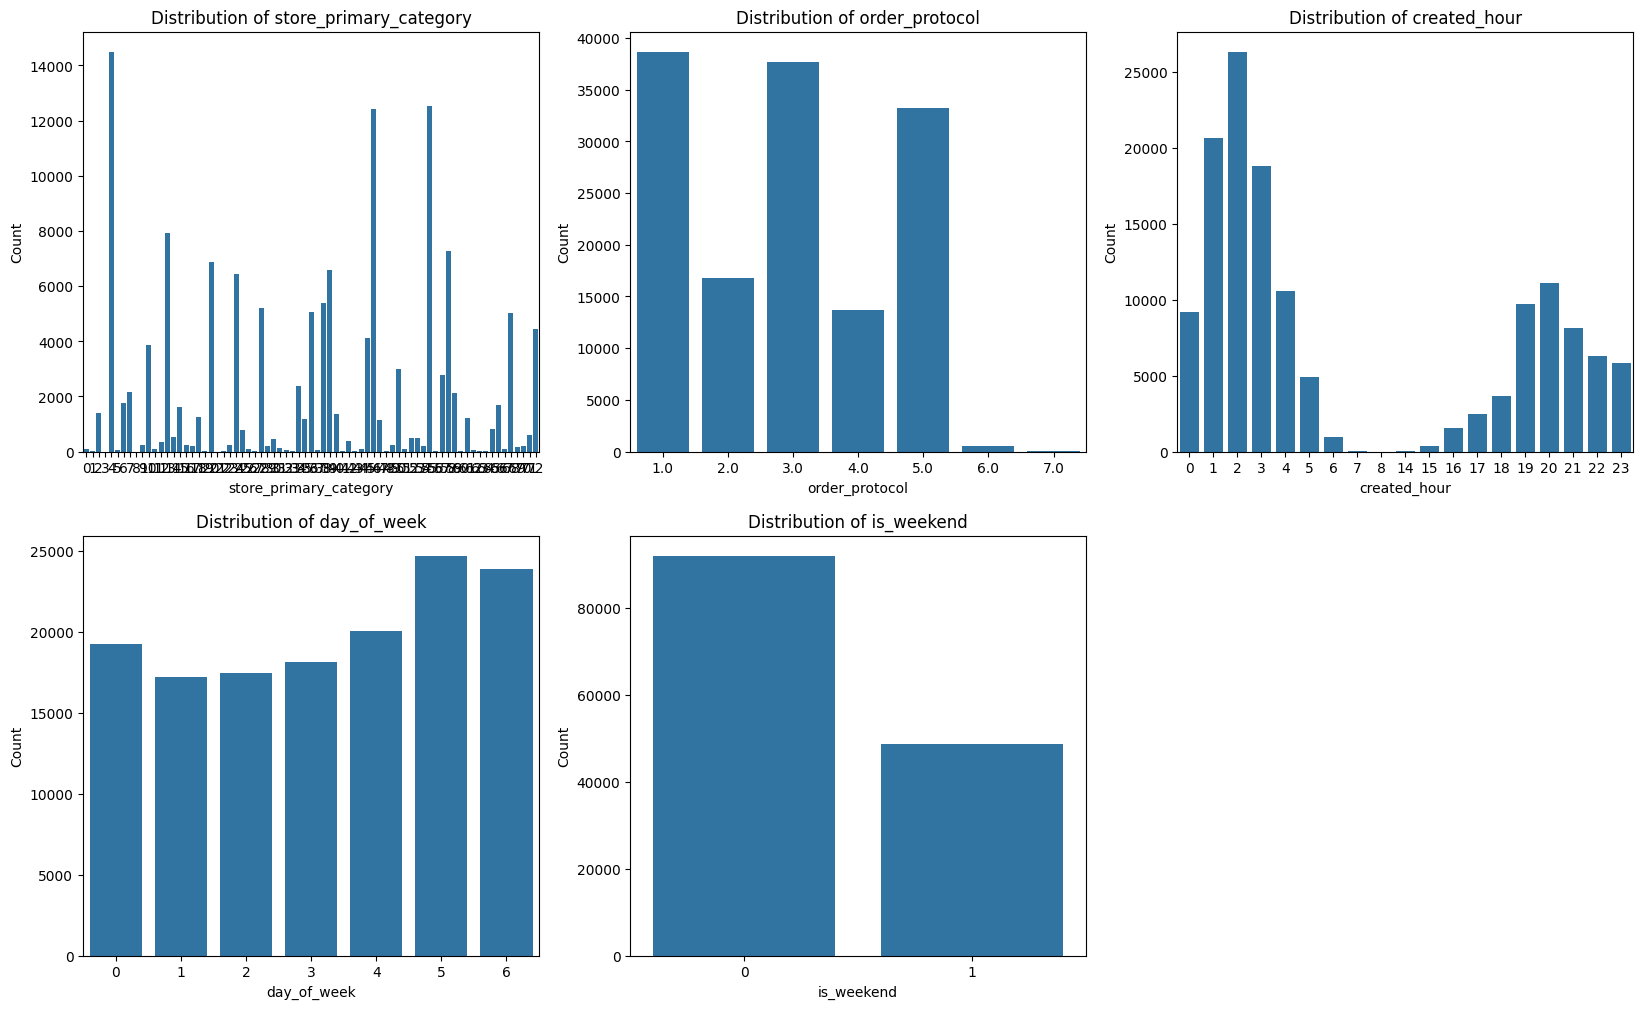

In [22]:
# Distribution of categorical columns

i =1 

plt.figure(figsize=(20, 12))

for col in categorical_columns:
    plt.subplot(2,3,i)
    sns.countplot( data = df_train , x = col )
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

    i +=1

plt.show()


##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

In [23]:
# Distribution of time_taken

plt.figure(figsize=(8,4))

sns.histplot( df_train['time_taken'] , kde = True , bins = 30)
plt.title('Distribution of Time Taken for Delivery')
plt.xlabel('Time Taken (mins)')
plt.ylabel('Frequency')

plt.show()


In [25]:
# Distribution of time_taken


plt.figure(figsize=(8,4))

sns.boxplot(y= df_train['time_taken'] )
plt.title('Distribution of Time Taken for Delivery')
plt.ylabel('Time Taken for Delivery (mins)')

plt.show()

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

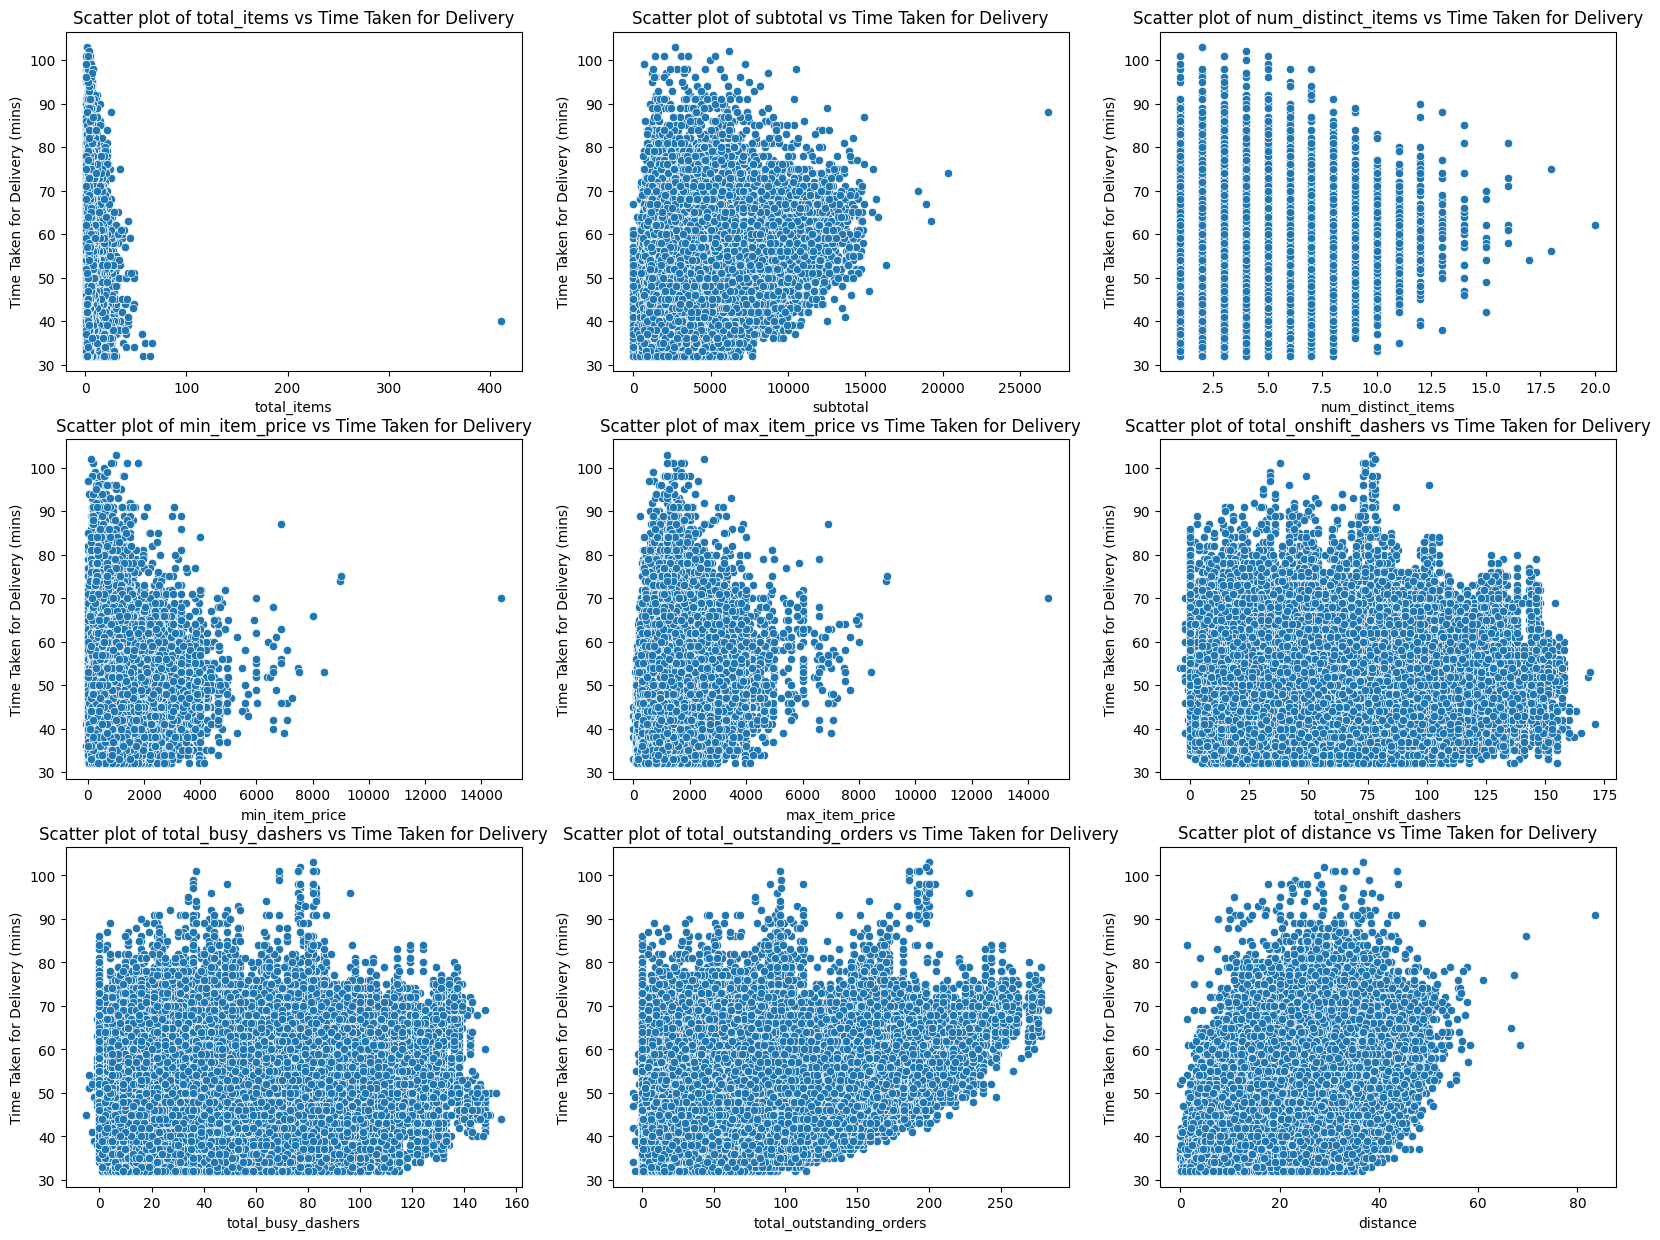

In [26]:
# Scatter plot to visualise the relationship between time_taken and other numerical features

i =1 

plt.figure(figsize=(20, 15))

for col in numerical_columns:
    plt.subplot(3,3,i)
    sns.scatterplot(x = df_train[col] , y= df_train['time_taken'])
    plt.title(f'Scatter plot of {col} vs Time Taken for Delivery')
    plt.xlabel(col)
    plt.ylabel('Time Taken for Delivery (mins)')

    i +=1

plt.show()


In [27]:
# Scatter plot to visualise the relationship between time_taken and other categorical features

i =1 

plt.figure(figsize=(20, 15))

for col in categorical_columns:
    plt.subplot(3,2,i)
    sns.scatterplot(x = col , y= 'time_taken' , data  = df_train)
    plt.title(f'Box plot of {col} vs Time Taken for Delivery')
    plt.xlabel(col)
    plt.ylabel('Time Taken for Delivery (mins)')

    i +=1

plt.show()

In [29]:
# Show the distribution of time_taken for different hours

plt.figure(figsize=(8,4))

sns.scatterplot(x = 'created_hour' , y= 'time_taken' , data  = df_train)
plt.title('Scatter plot of Time Taken for Delivery vs Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Time Taken for Delivery (mins)')

plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

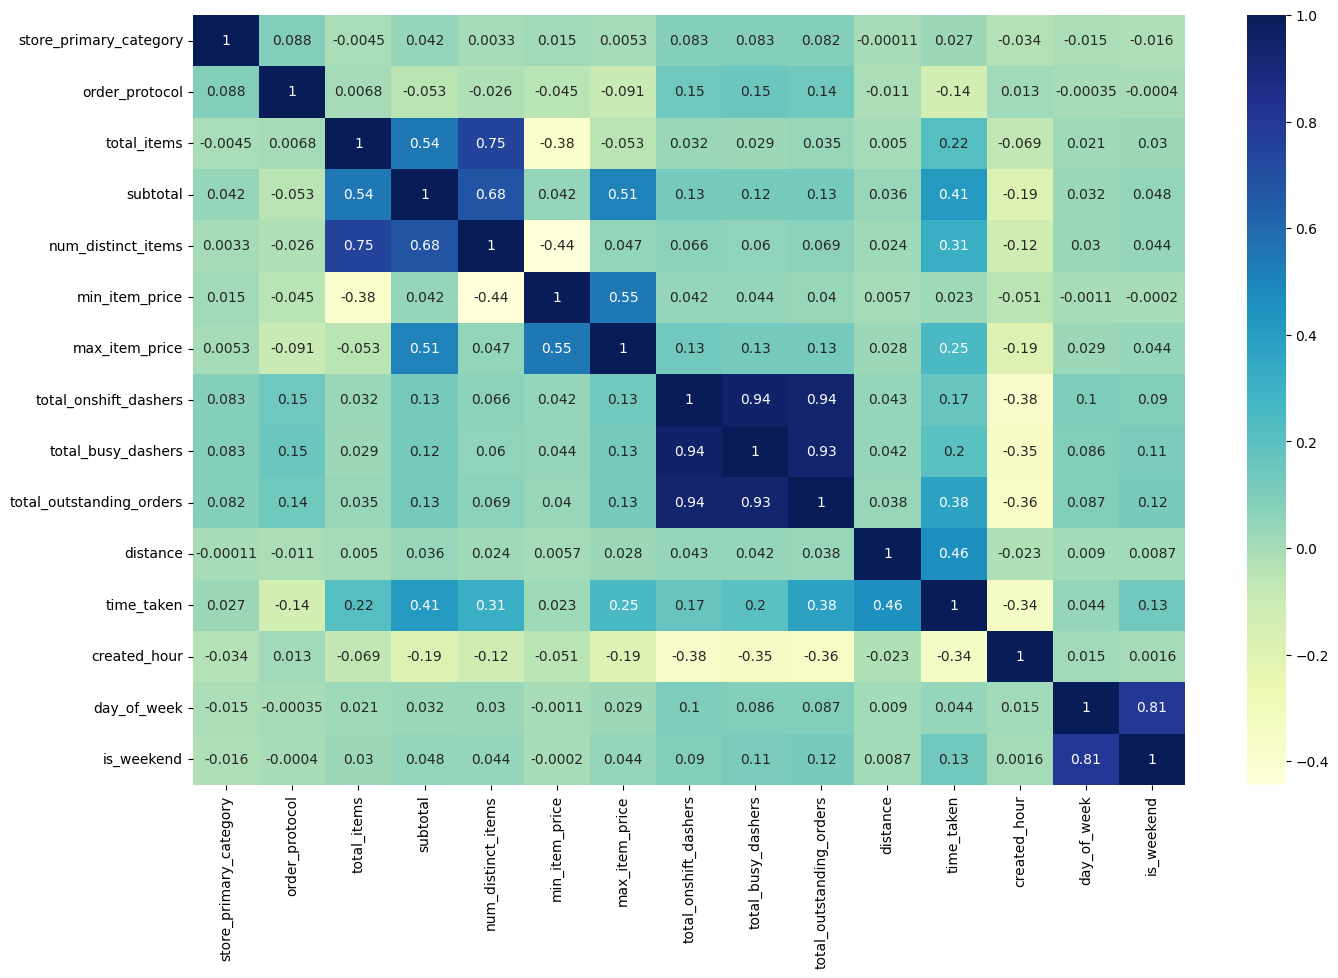

In [30]:
# Plot the heatmap of the correlation matrix

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [43]:
# Drop 3-5 weakly correlated columns from training dataset

df_train = df_train.drop(columns = ['store_primary_category', 'min_item_price', 'day_of_week'])

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

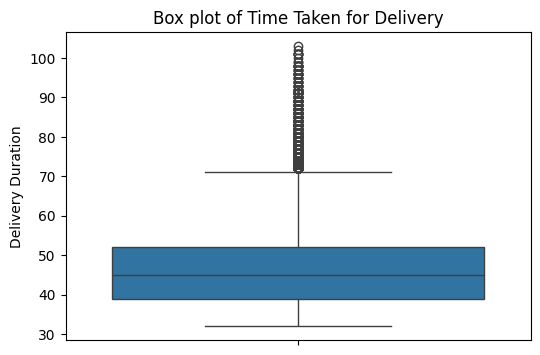

In [44]:
# Boxplot for time_taken

plt.figure(figsize=(6, 4))

sns.boxplot(y = df_train['time_taken'])
plt.title(f'Box plot of Time Taken for Delivery')
plt.ylabel('Delivery Duration')

plt.show()

In [45]:
numerical_columns_new = ['total_items','subtotal', 'num_distinct_items', 'max_item_price' , 'total_onshift_dashers'
                     , 'total_busy_dashers' , 'total_outstanding_orders' , 'distance']

i =1 

plt.figure(figsize=(20, 15))

for col in numerical_columns_new:
    plt.subplot(3,3,i)
    sns.boxplot(y = df_train[col])
    plt.title(f'Box plot of {col}')
    plt.ylabel(col)

    i +=1

plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [46]:
# Handle outliers

# cap the outliers 

numerical_columns_new = ['total_items','subtotal', 'num_distinct_items', 'max_item_price' , 'total_onshift_dashers'
                     , 'total_busy_dashers' , 'total_outstanding_orders' , 'distance']

for col in numerical_columns_new:

    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    df_train[col] =  df_train[col].clip(lower = lower_bound, upper = upper_bound)
    

In [31]:
df_train.head()

order_protocol  total_items  subtotal  num_distinct_items  \
42111             2.0            1      1350                   1   
58452             5.0            5      4285                   5   
20644             2.0            6      6395                   3   
79735             2.0            3      3660                   3   
167933            5.0            5      6395                   5   

        max_item_price  total_onshift_dashers  total_busy_dashers  \
42111             1350                   23.0                20.0   
58452              900                  112.0               100.0   
20644             1450                   80.0                79.0   
79735             1450                  127.0               106.0   
167933            2289                   44.0                44.0   

        total_outstanding_orders  distance  time_taken  created_hour  \
42111                       19.0      9.60        32.0            20   
58452                      187.0     34.56        71.0             2   
20644                      115.0     34.92        62.0             3   
79735                      173.0     25.76        54.0             2   
167933                      61.0     17.72        56.0             2   

        is_weekend  
42111            0  
58452            1  
20644            0  
79735            1  
167933           0

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [47]:
# Define numerical and categorical columns for easy EDA and data manipulation

numerical_columns_test = ['total_items','subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price' ,
                           'total_onshift_dashers' , 'total_busy_dashers' , 'total_outstanding_orders' , 'distance']

categorical_columns_test = ['store_primary_category','order_protocol','created_hour', 'day_of_week' , 'is_weekend']


#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

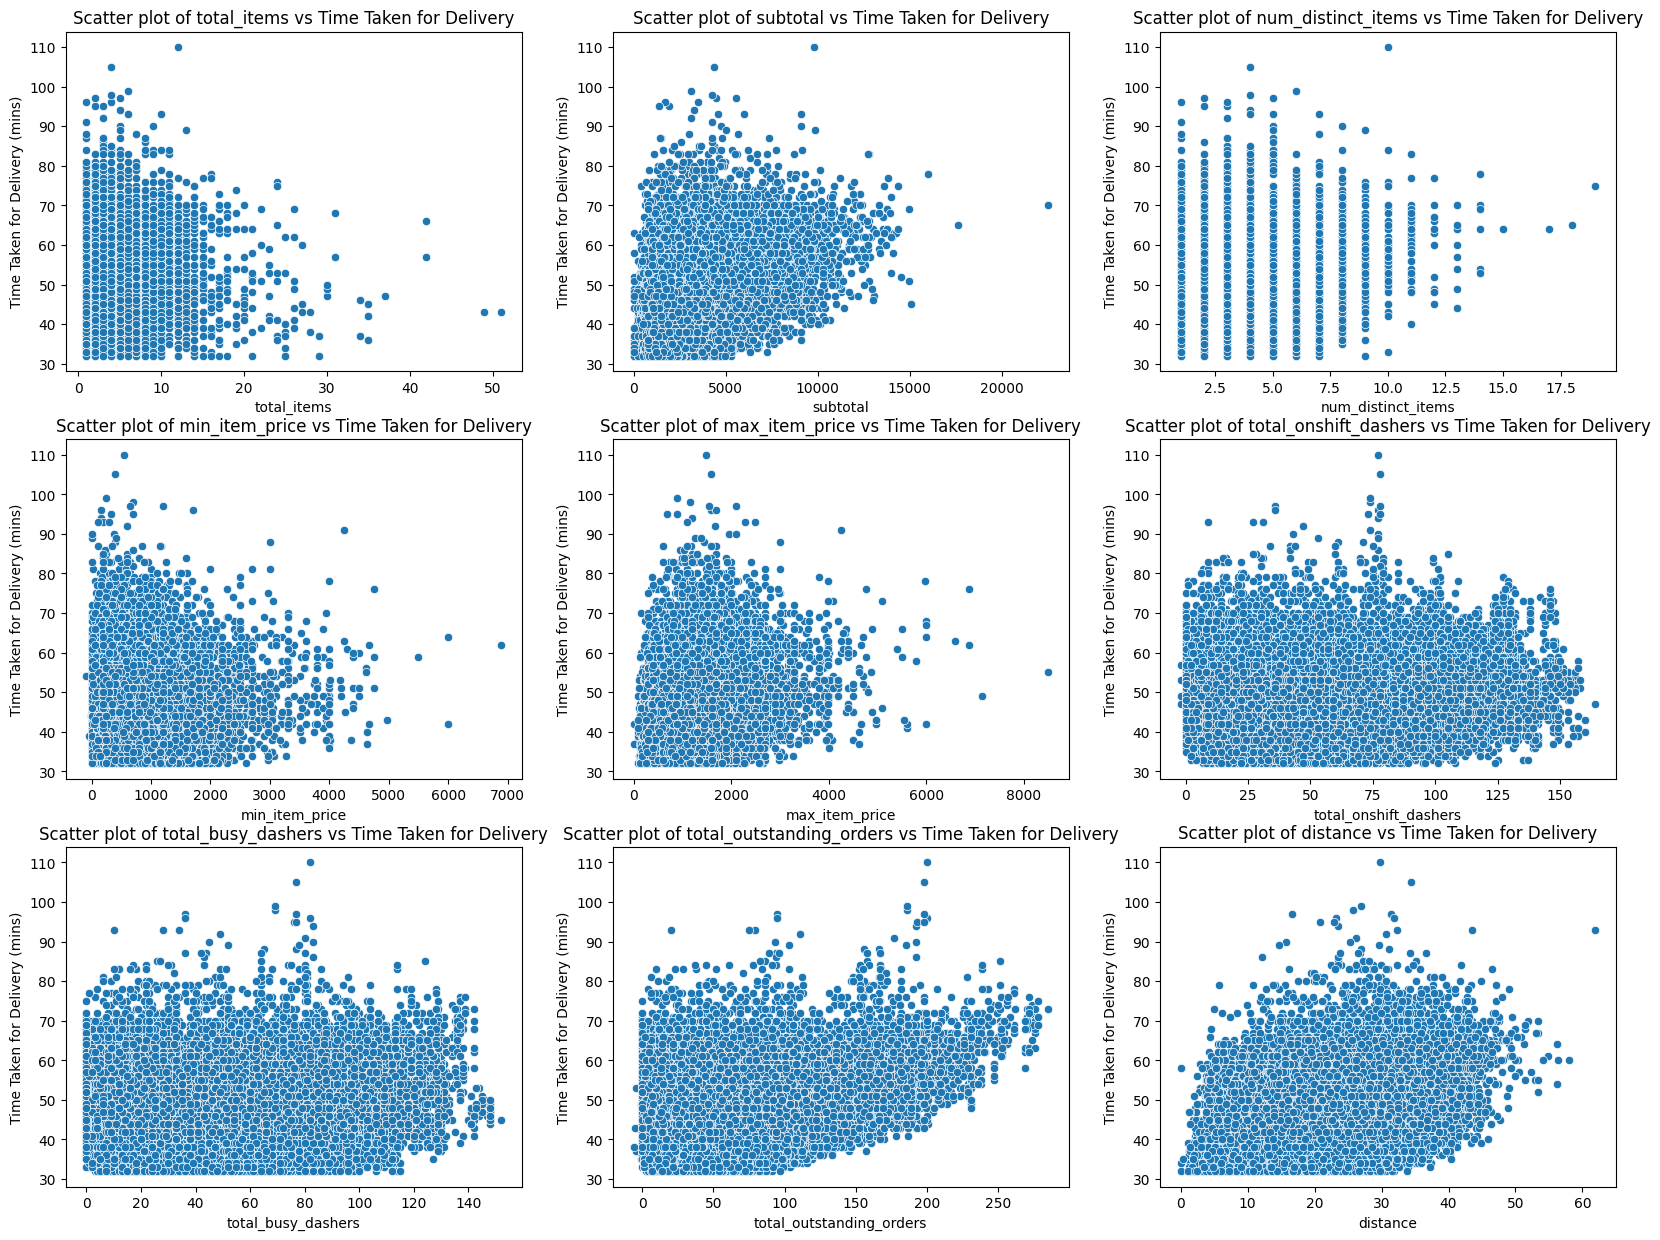

In [ ]:
# Plot distributions for all numerical columns

i =1 

plt.figure(figsize=(20, 15))

for col in numerical_columns_test:
    plt.subplot(3,3,i)
    sns.scatterplot(x = df_test[col] , y= df_test['time_taken'])
    plt.title(f'Scatter plot of {col} vs Time Taken for Delivery')
    plt.xlabel(col)
    plt.ylabel('Time Taken for Delivery (mins)')

    i +=1

plt.show()


##### **4.1.2**
Check the distribution of categorical features

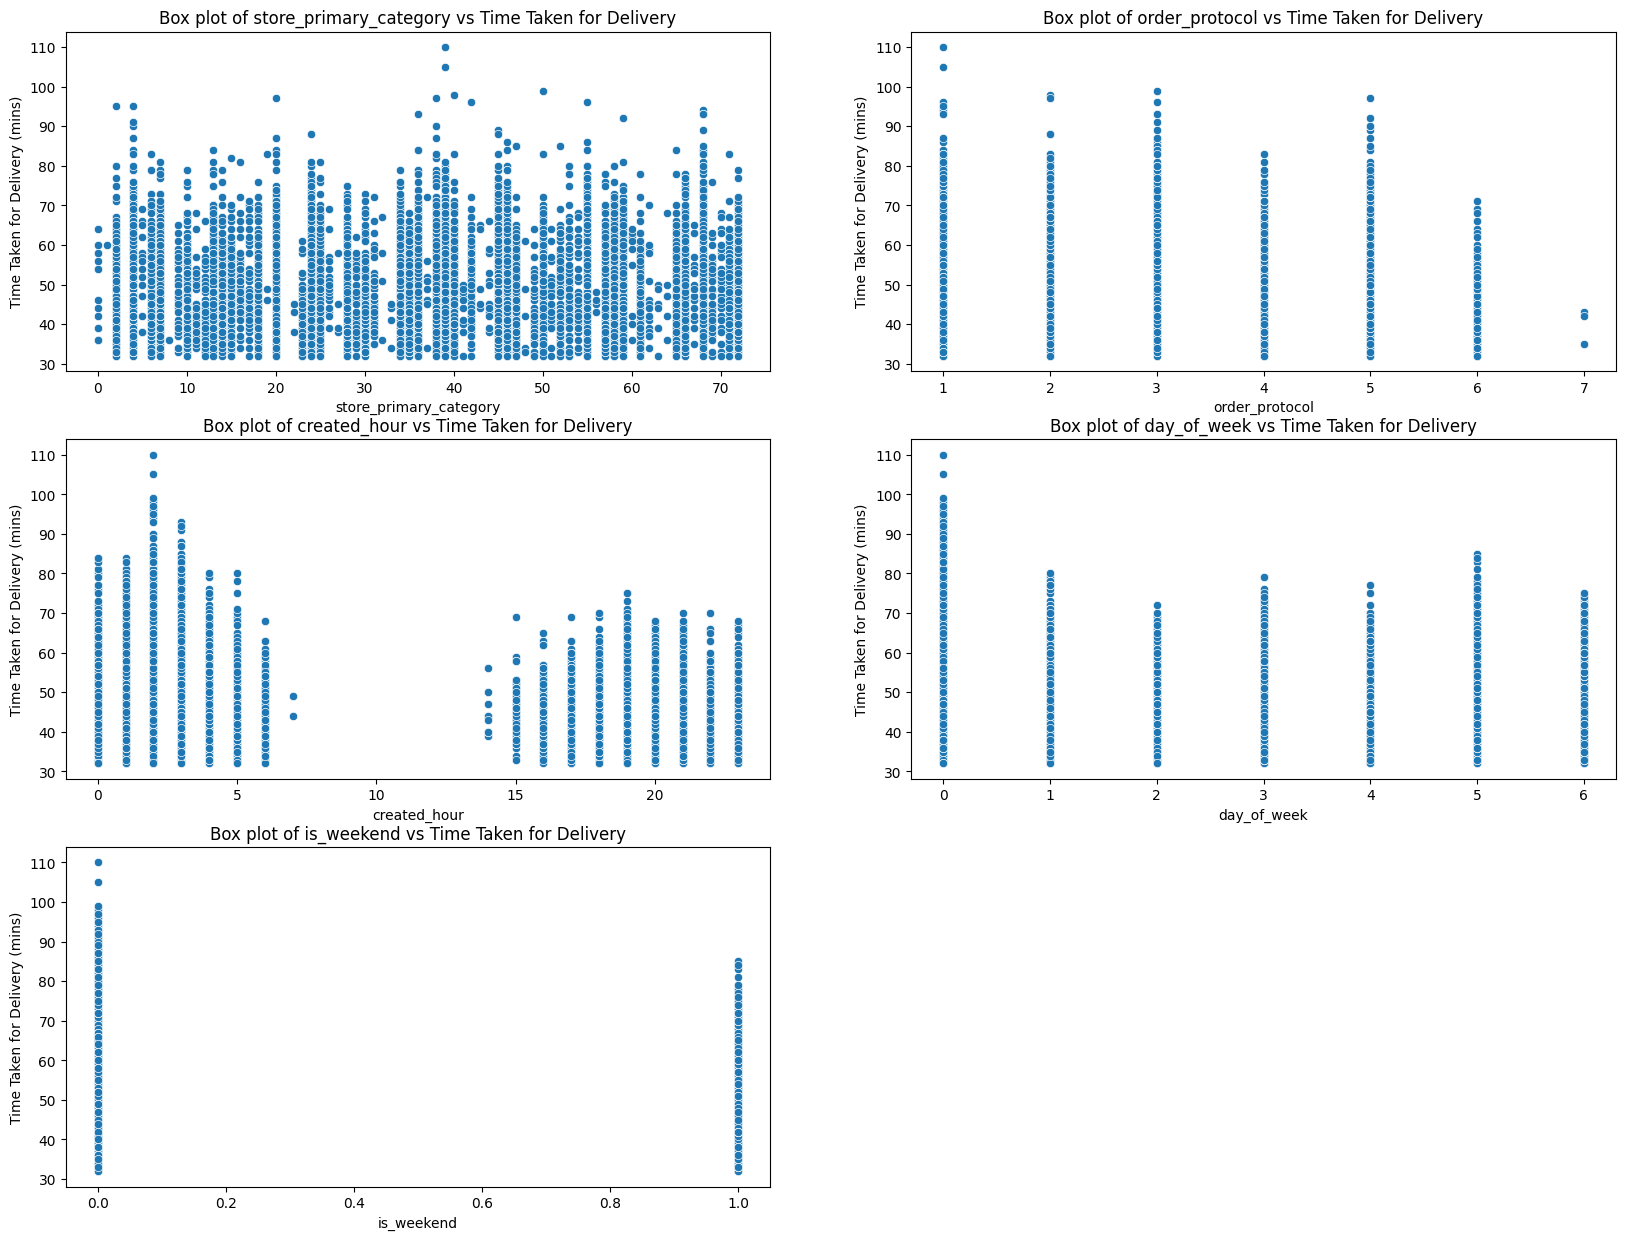

In [ ]:
# Distribution of categorical columns

i =1 

plt.figure(figsize=(20, 15))

for col in categorical_columns_test:
    plt.subplot(3,2,i)
    sns.scatterplot(x = col , y= 'time_taken' , data  = df_test)
    plt.title(f'Box plot of {col} vs Time Taken for Delivery')
    plt.xlabel(col)
    plt.ylabel('Time Taken for Delivery (mins)')

    i +=1

plt.show()


##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

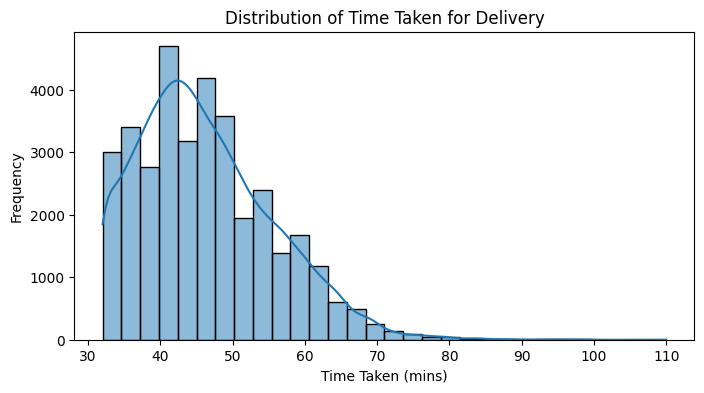

In [35]:
# Distribution of time_taken

plt.figure(figsize=(8,4))

sns.histplot( df_test['time_taken'] , kde = True , bins = 30)
plt.title('Distribution of Time Taken for Delivery')
plt.xlabel('Time Taken (mins)')
plt.ylabel('Frequency')

plt.show()

#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features



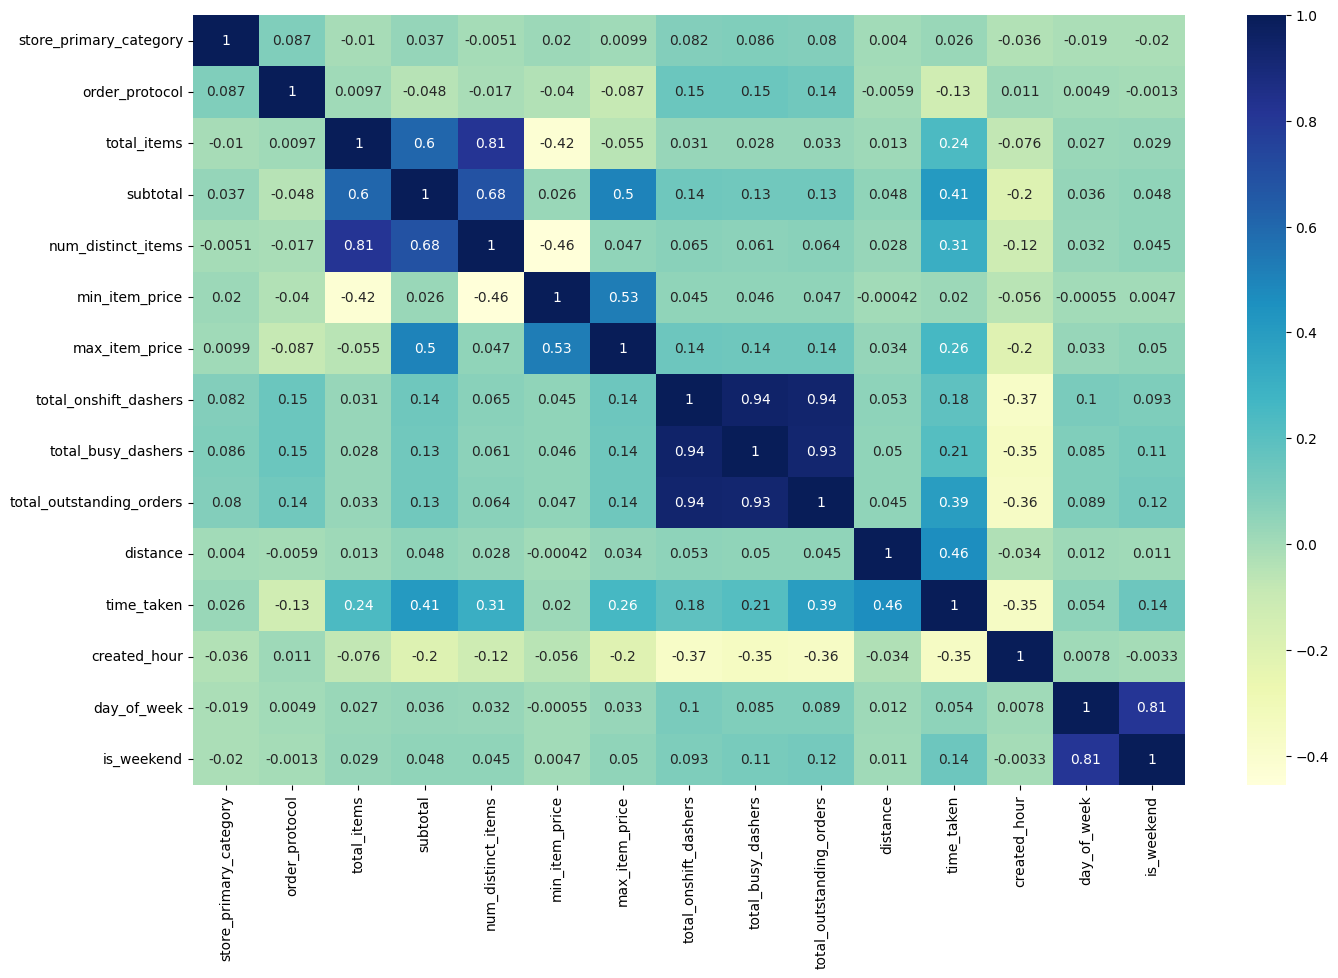

In [36]:
# Plot the heatmap of the correlation matrix

plt.figure(figsize = (16, 10))
sns.heatmap(df_test.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### **4.3** Drop the columns with weak correlations with the target variable

In [37]:
# Drop the weakly correlated columns from training dataset


df_test = df_test.drop(columns = ['store_primary_category', 'min_item_price', 'day_of_week'])

## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [38]:
# Import libraries

from sklearn.preprocessing import StandardScaler

In [40]:
df_train.head()

order_protocol  total_items  subtotal  num_distinct_items  \
42111        -0.602586    -1.147635 -0.820898           -1.130246   
58452         1.380400     1.130117  1.095809            1.673766   
20644        -0.602586     1.699555  2.473747            0.271760   
79735        -0.602586    -0.008759  0.687651            0.271760   
167933        1.380400     1.130117  2.473747            1.673766   

        max_item_price  total_onshift_dashers  total_busy_dashers  \
42111         0.464517              -0.636390           -0.680598   
58452        -0.504868               1.950494            1.813361   
20644         0.679936               1.020379            1.158696   
79735         0.679936               2.386486            2.000408   
167933        2.487301              -0.026001            0.067590   

        total_outstanding_orders  distance  time_taken  created_hour  \
42111                  -0.760212 -1.400206   -1.521724      1.328434   
58452                   2.551939  1.457881    2.661181     -0.746049   
20644                   1.132446  1.499103    1.695895     -0.630800   
79735                   2.275926  0.450222    0.837863     -0.746049   
167933                  0.067826 -0.470412    1.052371     -0.746049   

        is_weekend  
42111            0  
58452            1  
20644            0  
79735            1  
167933           0

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [39]:
# Apply scaling to the numerical columns

scaler = StandardScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_var = ['total_items','subtotal', 'num_distinct_items', 'max_item_price' , 'total_onshift_dashers', 'total_busy_dashers' ,
        'total_outstanding_orders' , 'distance','order_protocol','created_hour' , 'time_taken' ]

df_train[num_var] = scaler.fit_transform(df_train[num_var])

In [41]:
df_train.head()

order_protocol  total_items  subtotal  num_distinct_items  \
42111        -0.602586    -1.147635 -0.820898           -1.130246   
58452         1.380400     1.130117  1.095809            1.673766   
20644        -0.602586     1.699555  2.473747            0.271760   
79735        -0.602586    -0.008759  0.687651            0.271760   
167933        1.380400     1.130117  2.473747            1.673766   

        max_item_price  total_onshift_dashers  total_busy_dashers  \
42111         0.464517              -0.636390           -0.680598   
58452        -0.504868               1.950494            1.813361   
20644         0.679936               1.020379            1.158696   
79735         0.679936               2.386486            2.000408   
167933        2.487301              -0.026001            0.067590   

        total_outstanding_orders  distance  time_taken  created_hour  \
42111                  -0.760212 -1.400206   -1.521724      1.328434   
58452                   2.551939  1.457881    2.661181     -0.746049   
20644                   1.132446  1.499103    1.695895     -0.630800   
79735                   2.275926  0.450222    0.837863     -0.746049   
167933                  0.067826 -0.470412    1.052371     -0.746049   

        is_weekend  
42111            0  
58452            1  
20644            0  
79735            1  
167933           0

In [42]:
df_train.describe()

order_protocol   total_items      subtotal  num_distinct_items  \
count    1.406210e+05  1.406210e+05  1.406210e+05        1.406210e+05   
mean    -3.552183e-17 -6.316115e-17  1.288993e-16       -5.608710e-18   
std      1.000004e+00  1.000004e+00  1.000004e+00        1.000004e+00   
min     -1.263582e+00 -1.147635e+00 -1.702517e+00       -1.130246e+00   
25%     -1.263582e+00 -5.781971e-01 -7.784493e-01       -1.130246e+00   
50%      5.840897e-02 -8.758967e-03 -2.527428e-01       -4.292429e-01   
75%      7.194042e-01  5.606792e-01  5.224293e-01        2.717601e-01   
max      2.702390e+00  2.268994e+00  2.473747e+00        2.374769e+00   

       max_item_price  total_onshift_dashers  total_busy_dashers  \
count    1.406210e+05           1.406210e+05        1.406210e+05   
mean     1.793524e-16           4.661293e-18        5.224690e-17   
std      1.000004e+00           1.000004e+00        1.000004e+00   
min     -2.443639e+00          -1.421175e+00       -1.459960e+00   
25%     -7.224417e-01          -8.107864e-01       -8.364705e-01   
50%     -8.480143e-02          -2.294642e-01       -2.129808e-01   
75%      5.614556e-01           6.134530e-01        6.287303e-01   
max      2.487301e+00           2.749812e+00        2.826531e+00   

       total_outstanding_orders      distance    time_taken  created_hour  \
count              1.406210e+05  1.406210e+05  1.406210e+05  1.406210e+05   
mean              -3.481443e-17 -8.822350e-17 -4.406122e-17 -4.120633e-17   
std                1.000004e+00  1.000004e+00  1.000004e+00  1.000004e+00   
min               -1.253091e+00 -2.499470e+00 -1.521724e+00 -9.765475e-01   
25%               -7.996420e-01 -7.452275e-01 -7.709463e-01 -7.460494e-01   
50%               -3.264777e-01 -7.804638e-03 -1.274225e-01 -6.308003e-01   
75%                5.409903e-01  7.204577e-01  6.233553e-01  1.213185e+00   
max                2.551939e+00  2.918986e+00  6.093308e+00  1.674181e+00   

          is_weekend  
count  140621.000000  
mean        0.345482  
std         0.475527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

Dividing into X and Y sets for the model building

In [43]:
y_train = df_train.pop('time_taken')
X_train = df_train

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [44]:
# Create/Initialise the model

import statsmodels.api as sm

# Add constant

X_train_lm = sm.add_constant(X_train)

In [45]:
# Train the model using the training data
lr_1 = sm.OLS(y_train, X_train_lm).fit()

# Check the parameters obtained

lr_1.params

const                      -0.056631
order_protocol             -0.109957
total_items                -0.008840
subtotal                    0.250803
num_distinct_items          0.080692
max_item_price              0.026296
total_onshift_dashers      -1.393006
total_busy_dashers         -0.482992
total_outstanding_orders    1.996717
distance                    0.445148
created_hour               -0.223099
is_weekend                  0.163920
dtype: float64

In [46]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                 7.420e+04
Date:                Mon, 24 Mar 2025   Prob (F-statistic):               0.00
Time:                        01:41:16   Log-Likelihood:                -64704.
No. Observations:              140621   AIC:                         1.294e+05
Df Residuals:                  140609   BIC:                         1.296e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other.

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'] ,2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

Features    VIF
5      total_onshift_dashers  12.34
6         total_busy_dashers  11.55
7   total_outstanding_orders  10.67
1                total_items   7.12
3         num_distinct_items   5.54
2                   subtotal   4.58
4             max_item_price   2.57
9               created_hour   1.22
0             order_protocol   1.04
10                is_weekend   1.01
8                   distance   1.00

In [48]:
# Apply scaling to the numerical columns

scaler = StandardScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_var = ['total_items','subtotal', 'num_distinct_items', 'max_item_price' , 'total_onshift_dashers', 'total_busy_dashers' ,
        'total_outstanding_orders' , 'distance','order_protocol','created_hour' , 'time_taken' ]

df_test[num_var] = scaler.fit_transform(df_test[num_var])

In [49]:
y_test = df_test.pop('time_taken')
X_test = df_test

In [50]:
X_test_lm = sm.add_constant(X_test)

In [51]:
# Make predictions

y_test_pred = lr_1.predict(X_test_lm)


In [65]:
# Find results for evaluation metrics
# import libraries
from sklearn.metrics import r2_score, mean_squared_error

# Calculate r2_score on test data

r2_score = r2_score(y_true = y_test, y_pred = y_test_pred)
print(f"R2 Score on test data : {r2_score}")

# Calculate Mean Squared Error
mse = mean_squared_error(y_test,y_test_pred)
print (f"Mean Squared Error : {mse}")

R2 Score on test data : 0.8737258571369254
Mean Squared Error : 0.1262741428630746


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [136]:
# import libraries

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [139]:
# Split data into training and testing sets

from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train_rfe, df_test_rfe = train_test_split(porter, train_size= 0.8, test_size= 0.2, random_state= 100)


In [141]:
# Apply scaling to the numerical columns

scaler = StandardScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_var = ['total_items','subtotal', 'num_distinct_items', 'max_item_price' , 'min_item_price', 'total_onshift_dashers', 'total_busy_dashers' ,
        'total_outstanding_orders' , 'distance','order_protocol','created_hour' , 'time_taken' ]

df_train_rfe[num_var] = scaler.fit_transform(df_train_rfe[num_var])

In [142]:
y_train_rfe = df_train_rfe.pop('time_taken')
X_train_rfe = df_train_rfe

In [143]:
# Loop through the number of features and test the model

lm = LinearRegression()

lm.fit(X_train_rfe, y_train_rfe)
rfe = RFE(lm,n_features_to_select= X_train_rfe.shape[1])

rfe = rfe.fit(X_train_rfe,y_train_rfe)

In [144]:
list(zip(X_train_rfe.columns, rfe.support_, rfe.ranking_))

[('store_primary_category', np.True_, np.int64(1)),
 ('order_protocol', np.True_, np.int64(1)),
 ('total_items', np.True_, np.int64(1)),
 ('subtotal', np.True_, np.int64(1)),
 ('num_distinct_items', np.True_, np.int64(1)),
 ('min_item_price', np.True_, np.int64(1)),
 ('max_item_price', np.True_, np.int64(1)),
 ('total_onshift_dashers', np.True_, np.int64(1)),
 ('total_busy_dashers', np.True_, np.int64(1)),
 ('total_outstanding_orders', np.True_, np.int64(1)),
 ('distance', np.True_, np.int64(1)),
 ('created_hour', np.True_, np.int64(1)),
 ('day_of_week', np.True_, np.int64(1)),
 ('is_weekend', np.True_, np.int64(1))]

In [151]:
X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train_rfe, X_train_rfe).fit()
lm.params

const                      -0.037267
store_primary_category      0.000459
order_protocol             -0.107485
total_items                -0.009885
subtotal                    0.245735
num_distinct_items          0.098114
min_item_price              0.014218
max_item_price              0.034199
total_onshift_dashers      -1.337776
total_busy_dashers         -0.492685
total_outstanding_orders    1.956787
distance                    0.446395
created_hour               -0.232898
day_of_week                -0.012004
is_weekend                  0.172216
dtype: float64

In [152]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                 6.905e+04
Date:                Sun, 23 Mar 2025   Prob (F-statistic):               0.00
Time:                        23:01:19   Log-Likelihood:                -54432.
No. Observations:              140621   AIC:                         1.089e+05
Df Residuals:                  140606   BIC:                         1.090e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [155]:
# Drop weakly correlated columns from training dataset based on coeffocient

df_train_rfe = df_train_rfe.drop(columns = ['store_primary_category', 'min_item_price', 'day_of_week'])

KeyError: "['store_primary_category', 'min_item_price', 'day_of_week'] not found in axis"

In [156]:
# Build the final model with selected number of features

# Creating X_test dataframe with RFE selected variables
X_train_rfe = df_train_rfe

X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train_rfe, X_train_rfe).fit()
lm.params

const                      -0.044793
order_protocol             -0.106699
total_items                -0.010992
subtotal                    0.250482
num_distinct_items          0.089242
max_item_price              0.040065
total_onshift_dashers      -1.347710
total_busy_dashers         -0.487887
total_outstanding_orders    1.962088
distance                    0.446333
created_hour               -0.233544
is_weekend                  0.129654
dtype: float64

In [157]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                 8.758e+04
Date:                Sun, 23 Mar 2025   Prob (F-statistic):               0.00
Time:                        23:08:55   Log-Likelihood:                -54645.
No. Observations:              140621   AIC:                         1.093e+05
Df Residuals:                  140609   BIC:                         1.094e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [158]:
vif = pd.DataFrame()

vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'] ,2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

Features    VIF
6      total_onshift_dashers  11.86
7         total_busy_dashers  11.27
8   total_outstanding_orders   9.94
3                   subtotal   3.43
4         num_distinct_items   3.23
2                total_items   2.41
5             max_item_price   1.90
0                      const   1.54
10              created_hour   1.21
1             order_protocol   1.04
11                is_weekend   1.02
9                   distance   1.00

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

<Figure size 1000x600 with 0 Axes>

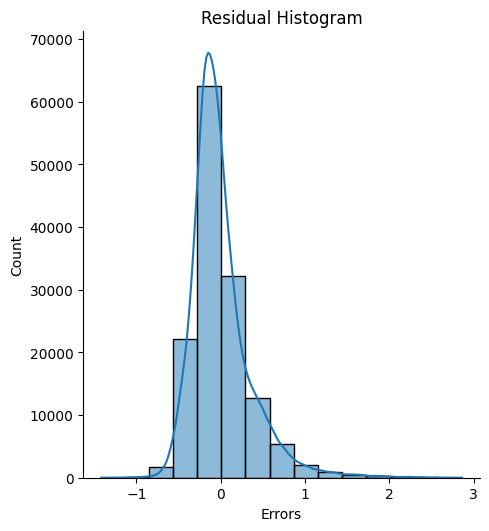

In [177]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram

y_pred_rfe = lm.predict(X_train_rfe)

res = y_train_rfe - y_pred_rfe
plt.figure(figsize=(10, 6))
sns.displot(res , bins = 15, kde = True)
plt.title("Residual Histogram")
plt.xlabel('Errors')

plt.show()

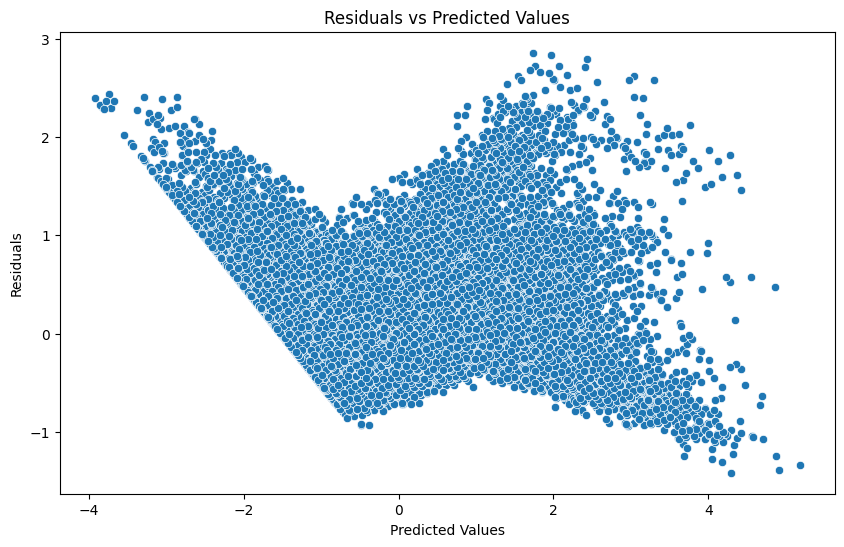

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x = y_pred_rfe , y= res)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


In [178]:
# Q-Q Plot (Normality of residuals)

from scipy import stats

plt.figure(figsize=(10, 6))
stats.probplot(res, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [ ]:
# Compare the scaled vs unscaled features used in the final model



Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [ ]:
# Analyze the effect of a unit change in a feature, say 'total_items'



Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>
There are 2 categorical attributes in the dataset: store_primary_category, order_protocol. 

For "Store_primary_category", after correlation analysis, the correlation coefficient between "Store_primary_category" and "time taken" was 0.027 which is very small. This suggests that the feature doesnot have significant impact on "time_taken" and therefore was dropped before building the model. 

"Order_Protocol": This variable has coefficient of -0.11 which indicates slightly inverse relationship with "time_taken". Order_Protocol represents how the order was placed (e.g., via Porter, call to restaurant, etc.). Thus, it represents certain order protocols result in slightly faster or slower delivery times.



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>
"Test_size" of 0.2 during splitting the data into training and test sets refers to proportion of dataset that will be allocated as test dataset. In this case, it signifies that 20% of the total dataset will be used as test data, while remaining 80% will be used as training data.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>

Distance has the highest correlation with "time_taken" which is 0.46 in this case.



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>
Boxplot was used to identify outliers for both target variable (time_taken) and other numerical variables. Values falling outside the whiskers were analyzed. Variables like "total items", "number of distinct items", "subtotal " and "distance" have logical relationship with "time taken" as higher value for these features will result in longer delivery time. 

Capping was used to manage outliers without completely removing them. This involved setting lower and upper bounds to the extreme values. In this case, it was set to Q1 - 1.5*IQR and Q3 + 1.3*IQR respectively.



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>

Based on the final model, top 3 features which significantly affected the delivery time are:

Total_outstanding_orders: 1.9967
There is significant positive correlation. Higher Total Outstanding orders could mean potentially higher workload for porter. They may be managing multiple deliveries simultaneously or sequentially, which lead to delays in completing delivery.

Total_onshift_dashers: -1.3930
There is significant inverse correlation. Higher Total onshift dashers means increased capacity for delivery and hence more efficient distribution of orders, quicker assignment of delivery.

Total_Busy_dashers: -0.4830
There is significant inverse correlation. Higher total busy dasher may indicate that more dashers are actively processing deliveries thus reducing the wait times. 



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>

Linear Regression is a statistical technique to understand the relationship between a dependent variable and one or many independent variables. The objective of linear regression is to find a linear equation that can best determine the value of dependent variables Y for different values of independent variable X.





---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>

1. Number of independent variables:  Linear Regression explains the relationship between a dependent variable and one indepenndent variable using a straight line. Multiple Linear Regression explains the relationship between a dependent variable and several independent variables using a linear eqaution.

2. Interpretation of Coefficients: In case of Simple Linear Regression, coefficient B1 represnts the change in target variable y for a unit change in independent variable X. Whereas in case of Multiple Linear Regression, coefficient Bi of Xi represents change in target variable y for a unit change in independent variable X keeping all other predictors constant.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>

Cost Function, also known as residual sum of squares, measures how well the model's predictions align with the the actual data by calculating the error between the predicted values and the actual values. Since this is error function this should be minimum. 

It is minimized using
1. Differentiaition (differentitaion should be zero)
2. Gradient Descent ( this is an iteartive approach)




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>

Overfitting and underfitting are two common problems in machine learning related to bias variance trade off. Overfitting occurs when the model learns the training data too well and is not generalized. Underfitting occurs when the model is too simple and is unable to identify the underlying pattern in the data. 

Overfitting results in high train accuracy and low test accuracy. Underfitting has low train and test accuracy.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>

Residuals are defined as difference between y-coordinates of the actual data and y-co-ordinates of the predicted data. There are diffreent residual plots including Residual vs Predicted vaiables, Q-Q plot and Residual Histogram plt. 

Residual Plot helps us to identify:

1. Randomness: residual should be randomly scattered around the x axis. This confirms that there are no variables that could have helped the model better.

2. Normal Distribution: Error term should be normally distributed  

3. Heteroscedasticity: Spread of residual increases or decreases as the predicted value increases suggesting that variance is not constant. 

4. Homoscedasticity: Error term has constant variance then the inference made by the model is unreliable.